## Project Objective

The goal of this project is to predict airline passenger satisfaction using demographic and travel-related features

In [25]:
#Step 1: Import Required Libraries

In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
#Step 2: Load the Dataset

In [28]:
df = pd.read_csv("Data.csv")

C:\Users\ACER\AppData\Local\Temp\ipykernel_8900\2699760885.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data.csv")


In [29]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [30]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [32]:
df.shape

(129880, 24)

In [34]:
df.describe()

,ID,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [36]:
df.duplicated().sum()

0

In [37]:
#Step 3: Data Cleaning

In [38]:
#Outlier Detection 

In [39]:
Q1 = df['Departure Delay'].quantile(0.25)
Q3 = df['Departure Delay'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [40]:
outliers_count = df[(df['Departure Delay'] < lower) | (df['Departure Delay'] > upper)].shape[0]
print("Outliers in Departure Delay:", outliers_count)

Outliers in Departure Delay: 18098


In [41]:
df['Departure Delay'] = np.where(df['Departure Delay'] > upper, upper,
                          np.where(df['Departure Delay'] < lower, lower, df['Departure Delay']))

In [42]:
# Convert Flight Distance to numeric 
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')

In [43]:
print(df['Flight Distance'].isnull().sum())


3


In [44]:
# Fill missing values in 'Arrival Delay'
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_8900\396820739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)


In [46]:
# After conversion,missing values
print("Missing values after conversion:")
print(df.isnull().sum())


Missing values after conversion:
ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           3
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0

In [47]:
# Drop remaining NaNs if any
df.dropna(inplace=True)

In [48]:
#Step 4: Check Dtypes

In [49]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                           float64
Departure Delay                           float64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [50]:
#Step 5: EDA 

In [52]:
# Target variable distribution

C:\Users\ACER\AppData\Local\Temp\ipykernel_8900\813584652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Satisfaction', palette='Set2')  # Try 'pastel', 'Set1', 'coolwarm', 'husl'


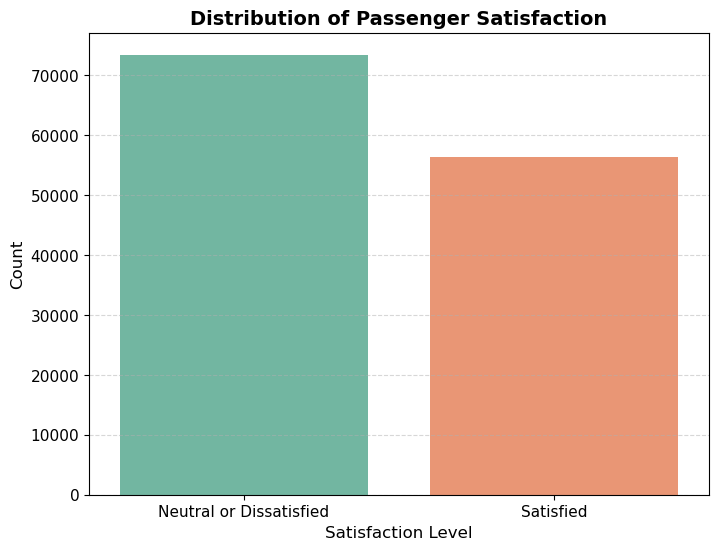

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction', palette='Set2')  # Try 'pastel', 'Set1', 'coolwarm', 'husl'
plt.title("Distribution of Passenger Satisfaction", fontsize=14, weight='bold')
plt.xlabel("Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [21]:
# Categorical features distribution

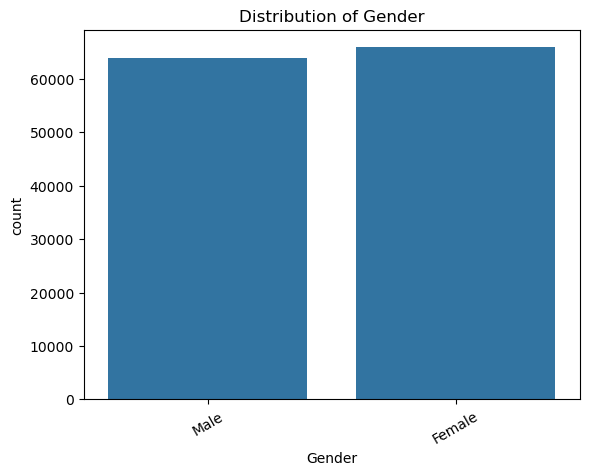

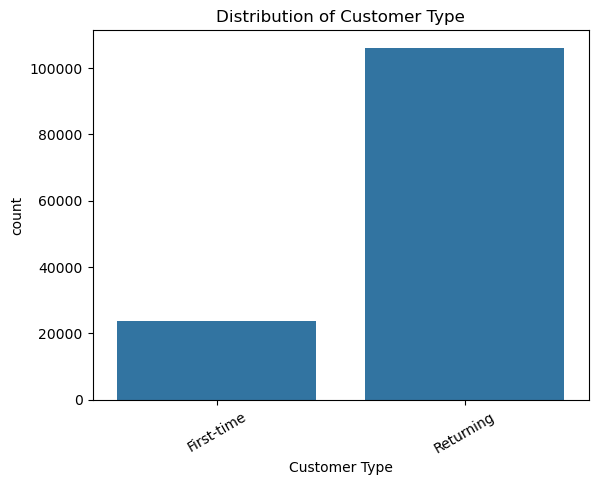

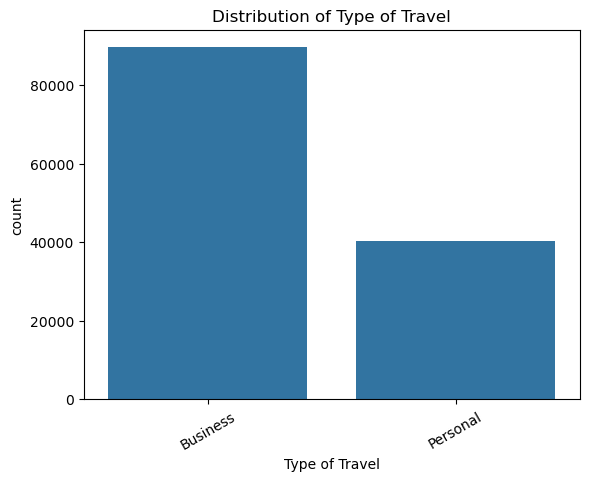

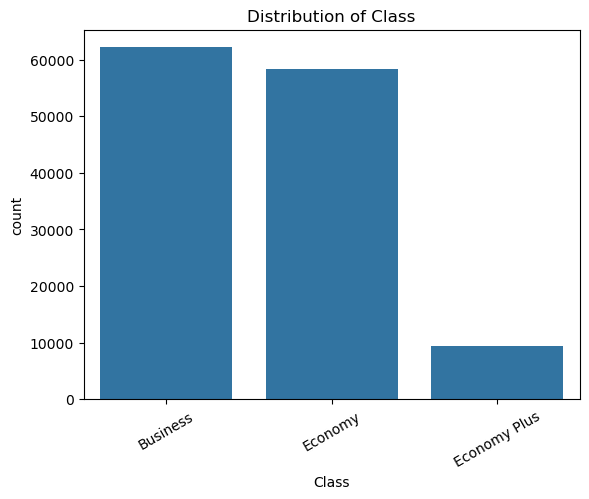

In [52]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.show()

In [24]:
#Step 6: Numerical Feature Distribution

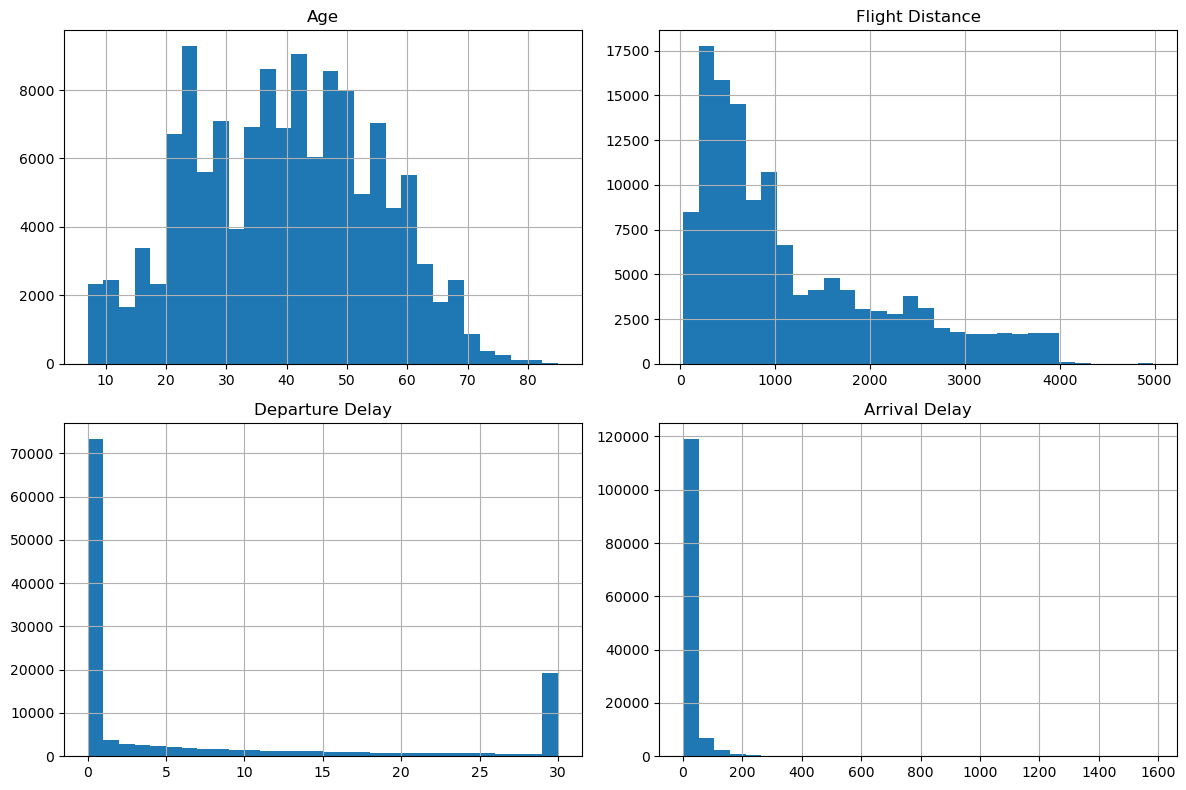

In [53]:
num_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [25]:
#step 7: Correlation Heatmap

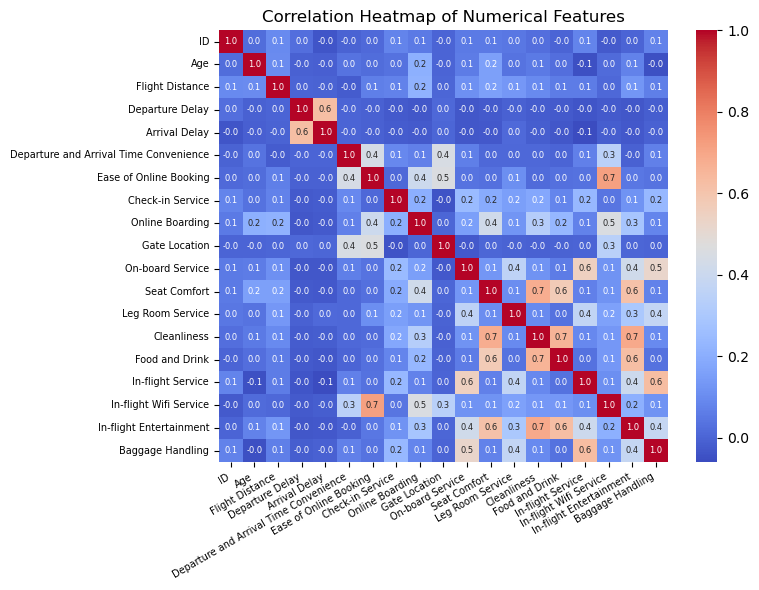

In [54]:
plt.figure(figsize=(8, 6))  # smaller size for screenshot
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 6})
plt.title("Correlation Heatmap of Numerical Features", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)
plt.tight_layout()
plt.show()


In [ ]:
#LabelEncoder

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']:
    df[col] = le.fit_transform(df[col])


In [56]:
#Step 8: Preprocessing - One Hot Encoding

In [59]:
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']
X_encoded = pd.get_dummies(X, drop_first=True)

In [58]:
#Step 9: Feature Scaling

In [60]:
numeric_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

In [31]:
#Step 10: Train-Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
#Step 11: Logistic Regression Model

In [63]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [64]:
y_pred_lr = log_model.predict(X_test)

In [65]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8762319063751155
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14690
           1       0.87      0.84      0.86     11286

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



In [66]:
#Step 12: Random Forest Model

In [67]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred_rf = rf_model.predict(X_test)

In [69]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9635817677856483
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14690
           1       0.97      0.94      0.96     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [55]:
#Step 13: Confusion Matrix

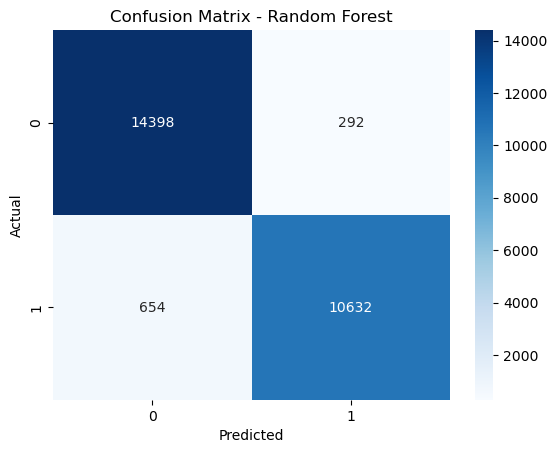

In [70]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [57]:
#Step 14: Feature Importance

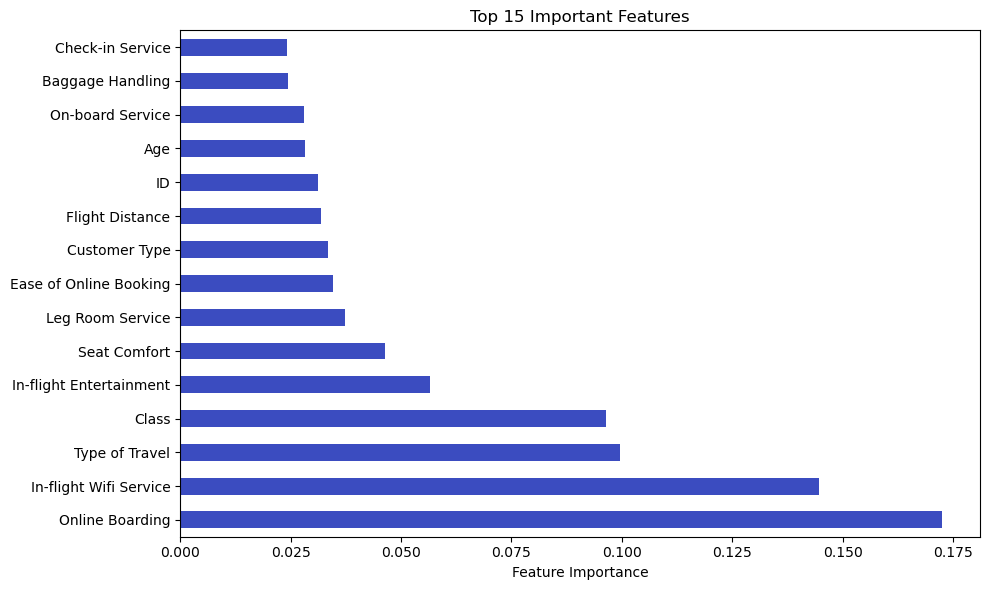

In [71]:
importances = rf_model.feature_importances_
feat_names = X_encoded.columns
feat_imp_df = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(15)
feat_imp_df.plot(kind='barh', title='Top 15 Important Features', figsize=(10, 6), colormap='coolwarm')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [70]:
# Model Accuracy Comparison

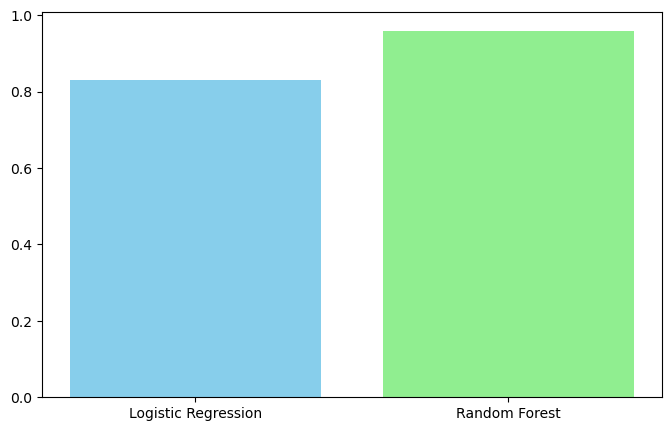

In [72]:
models = ['Logistic Regression', 'Random Forest']
accuracy = [0.83, 0.96]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy, color=['skyblue', 'lightgreen'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_8900\3192679426.py:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ACER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


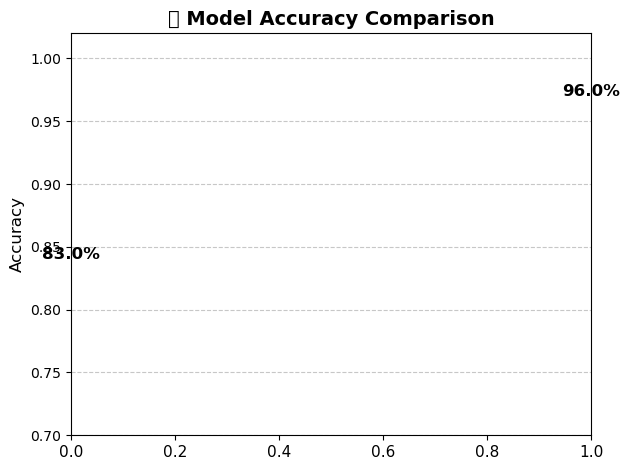

In [73]:
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.01, f"{acc*100:.1f}%", 
             ha='center', fontsize=12, fontweight='bold', color='black')
plt.title(' Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.show()    


 Logistic Regression achieved approximately 83% accuracy

 Random Forest outperformed with an accuracy of 96%

Top influential features were identified using feature importance analysis

All missing values were addressed before model training

While the majority of passengers were satisfied, the presence of neutral or dissatisfied customers highlights areas needing improvement, such as:In-flight Wi-Fi
Boarding process
Seat comfort